In [9]:
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

import matplotlib
import matplotlib.pyplot as plt

In [10]:
#Usando a ferramente Clustal Omega, é possível fazer o alinhamento das sequências
#proteicas.
with open("clustal_omega_ODZ3.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [11]:
# utilizando o modelo identity do DistanceCalculator:
calculator = DistanceCalculator('identity')

# calcula-se a matriz de distâncias entre as sequências dos organismos através do alinhamento múltiplo utilizado e obtido do Clustal Omega:
distance_matrix = calculator.get_distance(alignment)


print(distance_matrix)

[Nomascus_leucogenys]	0
[Symphalangus_syndactylus]	0.00440852314474649	0
[Pongo_abelii]	0.005510653930933085	0.006980161645848693	0
[Pongo_pygmaeus]	0.005510653930933085	0.006980161645848693	0.0007347538574578039	0
[Homo_sapiens]	0.005143277002204294	0.006612784717119791	0.004041146216017588	0.004041146216017588	0
[Gorilla_gorilla_gorilla]	0.005143277002204294	0.006612784717119791	0.004775900073475392	0.004041146216017588	0.0029390154298309934	0
[Pan_troglodytes]	0.005510653930933085	0.006980161645848693	0.004775900073475392	0.004041146216017588	0.0029390154298309934	0.0025716385011020915	0
[Pan_paniscus]	0.007714915503306385	0.005510653930933085	0.007714915503306385	0.006980161645848693	0.005878030859661987	0.005510653930933085	0.0036737692872887973	0
[Callithrix_jacchus]	0.007714915503306385	0.009184423218221882	0.006612784717119791	0.006612784717119791	0.006245407788390889	0.006980161645848693	0.006980161645848693	0.009919177075679686	0
[Cebus_imitator]	0.006245407788390889	0.008449

In [4]:
# utilizando o calculator criado anteriormente para o constructor da árvore:
constructor = DistanceTreeConstructor(calculator)

# constrói-se a árvore filogenética resultante do alinhamento múltiplo:
tree = constructor.build_tree(alignment)
tree.rooted = True

print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner26')
        Clade(branch_length=2.7266256429088378e-05, name='Inner24')
            Clade(branch_length=0.0001277208853783983, name='Inner23')
                Clade(branch_length=0.0005905297116091244, name='[Colobus_angolensis_palliatus]')
                Clade(branch_length=0.0002303281135194753, name='Inner22')
                    Clade(branch_length=0.0007925870224099942, name='Inner21')
                        Clade(branch_length=0.0001633583608866018, name='Inner20')
                            Clade(branch_length=0.001448801760785156, name='Inner14')
                                Clade(branch_length=0.001625819533148686, name='[Nomascus_leucogenys]')
                                Clade(branch_length=0.002782703611597804, name='[Symphalangus_syndactylus]')
                            Clade(branch_length=0.00018143336044926304, name='Inner19')
                                Clade(branch_length=0.0005105247749816241, nam

In [12]:
# para guardar a árvore filogenética criada num ficheiro 

Phylo.write(tree, "tree_odz3.xml", "phyloxml")

1

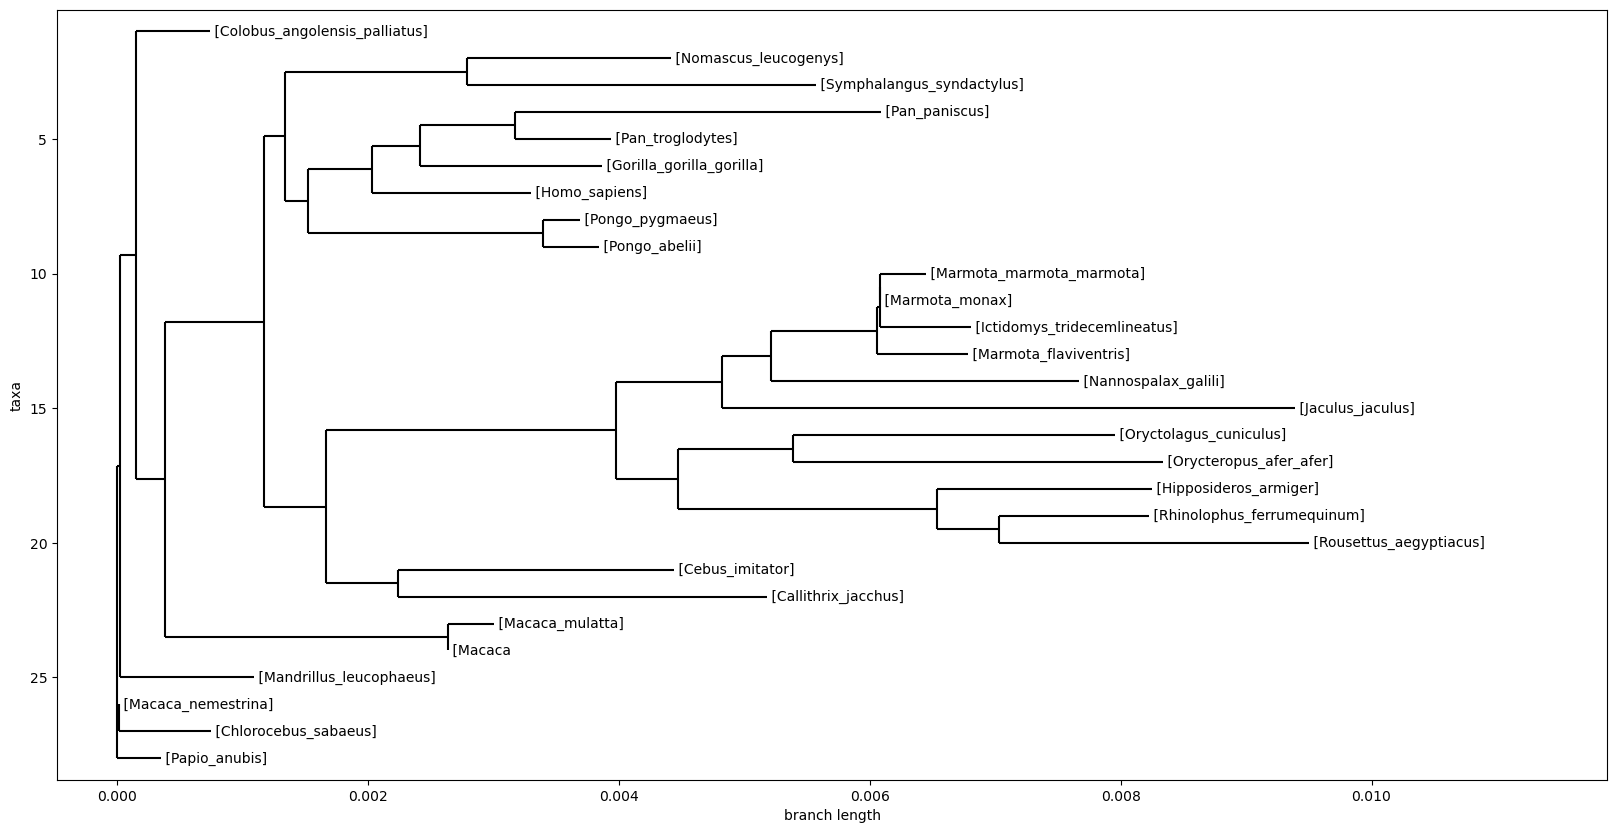

In [19]:
# para criar uma visão mais intuitiva e gráfica da árvore

        
fig = plt.figure(figsize=(20, 10), dpi=100)
matplotlib.rc('font', size=10)
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
axes = fig.add_subplot(1, 1, 1)
for clade in tree.find_clades():
    if "Inner" in clade.name:
        clade.name = ""
Phylo.draw(tree, axes=axes)
fig.savefig("tree_odz3")